<a href="https://colab.research.google.com/github/Motilipz/PW_Skills/blob/main/CNN_Architecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CNN Architecture | Assignment
Practical Questions: Question 6 to Question 10

### **Question 6:** Using keras, build and train a simple CNN model on the MNIST dataset from scratch. Include code for module creation, compilation, training, and evaluation.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Preprocess the data
# Normalize pixel values to 0-1 range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Reshape images to (height, width, channels) for CNN
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Convert labels to one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
x_train shape: (60000, 28, 28, 1)
y_train shape: (60000, 10)
x_test shape: (10000, 28, 28, 1)
y_test shape: (10000, 10)


In [ ]:
model = keras.Sequential(
    [
        keras.Input(shape=(28, 28, 1)), # Input layer with image shape
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(), # Flatten the 2D feature maps to 1D vector
        layers.Dropout(0.5), # Dropout for regularization
        layers.Dense(10, activation="softmax"), # Output layer with 10 classes
    ]
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
batch_size = 128
epochs = 15

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 40s 92ms/step - accuracy: 0.7631 - loss: 0.7674 - val_accuracy: 0.9775 - val_loss: 0.0826
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 37s 88ms/step - accuracy: 0.9622 - loss: 0.1225 - val_accuracy: 0.9832 - val_loss: 0.0566
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 37s 88ms/step - accuracy: 0.9716 - loss: 0.0917 - val_accuracy: 0.9878 - val_loss: 0.0455
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 37s 87ms/step - accuracy: 0.9787 - loss: 0.0688 - val_accuracy: 0.9887 - val_loss: 0.0437
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 88ms/step - accuracy: 0.9798 - loss: 0.0640 - val_accuracy: 0.9890 - val_loss: 0.0400
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 40s 87ms/step - accuracy: 0.9817 - loss: 0.0563 - val_accuracy: 0.9900 - val_loss: 0.0346
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 87ms/step - accuracy: 0.9838 - loss: 0.0542 - val_accuracy: 0.9900 - val_loss: 0.0350
Epoch 8/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 88ms/step - accuracy: 0.9844 - loss: 0.0469 - 

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print(f"Test loss: {score[0]:.4f}")
print(f"Test accuracy: {score[1]:.4f}")

Test loss: 0.0247
Test accuracy: 0.9913


### **Question 7:** Load and preprocess the CIFAR-10 dataset using Keras, and create a CNN model to classify RGB images. Show your preprocessing and architecture.


In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Load the CIFAR-10 dataset
(x_train_cifar, y_train_cifar), (x_test_cifar, y_test_cifar) = keras.datasets.cifar10.load_data()

# Preprocess the data
# Normalize pixel values to 0-1 range
x_train_cifar = x_train_cifar.astype("float32") / 255
x_test_cifar = x_test_cifar.astype("float32") / 255

# Convert labels to one-hot encoding
y_train_cifar = keras.utils.to_categorical(y_train_cifar, num_classes=10)
y_test_cifar = keras.utils.to_categorical(y_test_cifar, num_classes=10)

print(f"x_train_cifar shape: {x_train_cifar.shape}")
print(f"y_train_cifar shape: {y_train_cifar.shape}")
print(f"x_test_cifar shape: {x_test_cifar.shape}")
print(f"y_test_cifar shape: {y_test_cifar.shape}")

# Build the CNN Model for CIFAR-10
model_cifar = keras.Sequential(
    [
        keras.Input(shape=(32, 32, 3)), # Input layer with image shape for RGB (32x32x3)
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu", padding="same"),
        layers.BatchNormalization(),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu", padding="same"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.25),

        layers.Conv2D(64, kernel_size=(3, 3), activation="relu", padding="same"),
        layers.BatchNormalization(),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu", padding="same"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.25),

        layers.Flatten(), # Flatten the 2D feature maps to 1D vector
        layers.Dense(512, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(10, activation="softmax"), # Output layer with 10 classes
    ]
)

# Compile the Model
model_cifar.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

model_cifar.summary()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
x_train_cifar shape: (50000, 32, 32, 3)
y_train_cifar shape: (50000, 10)
x_test_cifar shape: (10000, 32, 32, 3)
y_test_cifar shape: (10000, 10)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,168,746 (8.27 MB)

 Trainable params: 2,168,554 (8.27 MB)

 Non-trainable params: 192 (768.00 B)

### **Question 8:** Using PyTorch, write a script to define and train a CNN on the MNIST dataset. Include model definition, data loaders, training loop, and accuracy evaluation.

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# 1. Hyperparameters
batch_size = 64
learning_rate = 0.001
epochs = 10

# 2. Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# 3. MNIST Dataset and Data Loaders
transform = transforms.Compose([
    transforms.ToTensor(), # Converts a PIL Image or numpy.ndarray to a tensor
    transforms.Normalize((0.1307,), (0.3081,)) # Normalize with MNIST's mean and std
])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# 4. CNN Model Definition
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1), # Output: (32, 28, 28)
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2), # Output: (32, 14, 14)
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1), # Output: (64, 14, 14)
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2) # Output: (64, 7, 7)
        )
        self.fc_layers = nn.Sequential(
            nn.Linear(64 * 7 * 7, 128),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, 10) # 10 classes for MNIST
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = x.reshape(x.size(0), -1) # Flatten the tensor
        x = self.fc_layers(x)
        return x

model = CNN().to(device)
print("\nCNN Model Architecture:")
print(model)

# 5. Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# 6. Training Loop
print("\nStarting Training...")
for epoch in range(epochs):
    model.train() # Set model to training mode
    for batch_idx, (data, targets) in enumerate(train_loader):
        data = data.to(device)
        targets = targets.to(device)

        # Forward pass
        scores = model(data)
        loss = criterion(scores, targets)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (batch_idx + 1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Step [{batch_idx+1}/{len(train_loader)}], Loss: {loss.item():.4f}')

# 7. Accuracy Evaluation
def check_accuracy(loader, model):
    model.eval() # Set model to evaluation mode
    num_correct = 0
    num_samples = 0
    with torch.no_grad(): # Disable gradient calculation during evaluation
        for x, y in loader:
            x = x.to(device)
            y = y.to(device)

            scores = model(x)
            _, predictions = scores.max(1) # Get the index of the max log-probability
            num_correct += (predictions == y).sum()
            num_samples += predictions.size(0)

    accuracy = (num_correct / num_samples) * 100
    return accuracy.item()

print("\nEvaluating on Training Data:")
train_accuracy = check_accuracy(train_loader, model)
print(f"Accuracy on training set: {train_accuracy:.2f}%")

print("\nEvaluating on Test Data:")
test_accuracy = check_accuracy(test_loader, model)
print(f"Accuracy on test set: {test_accuracy:.2f}%")


Using device: cpu


100%|██████████| 9.91M/9.91M [00:02<00:00, 4.83MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 131kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.22MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 9.68MB/s]



CNN Model Architecture:
CNN(
  (conv_layers): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc_layers): Sequential(
    (0): Linear(in_features=3136, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=128, out_features=10, bias=True)
  )
)

Starting Training...
Epoch [1/10], Step [100/938], Loss: 0.3074
Epoch [1/10], Step [200/938], Loss: 0.1407
Epoch [1/10], Step [300/938], Loss: 0.0981
Epoch [1/10], Step [400/938], Loss: 0.2026
Epoch [1/10], Step [500/938], Loss: 0.1704
Epoch [1/10], Step [600/938], Loss: 0.1210
Epoch [1/10], Step [700/938], Loss: 0.1119
Epoch [1/10], Step [800/938], Loss: 0.1620
Epoch [1/1

### **Question 9:** Given a custom image dataset stored in a local directory, write code using Keras ImageDataGenerator to preprocess and train a CNN model.

In [25]:
import os
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models


train_data_dir = '/content/dataset/train'
validation_data_dir = '/content/dataset/validation'

# Function to remove unwanted directories like .ipynb_checkpoints
def clean_directory(directory_path, unwanted_dir_name='.ipynb_checkpoints'):
    unwanted_path = os.path.join(directory_path, unwanted_dir_name)
    if os.path.exists(unwanted_path) and os.path.isdir(unwanted_path):
        print(f"Removing unwanted directory: {unwanted_path}")
        shutil.rmtree(unwanted_path)
    else:
        print(f"No unwanted directory '{unwanted_dir_name}' found in {directory_path}")

# Clean the training and validation directories BEFORE initializing ImageDataGenerator
clean_directory(train_data_dir)
clean_directory(validation_data_dir)

# Image dimensions and batch size
img_width, img_height = 150, 150
batch_size = 32
num_classes = 2 # Update this to the actual number of classes in your dataset
epochs = 10

# 1. Image Data Generators
# For training, include data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255, # Normalize pixel values to [0, 1]
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# For validation, only rescale
validation_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches from the directory
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical' # Use 'binary' for 2 classes, 'categorical' for >2 classes
)

# Flow validation images in batches from the directory
validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

# Print found classes and their indices
print(f"Classes found in training data: {train_generator.class_indices}")
print(f"Classes found in validation data: {validation_generator.class_indices}")

# 2. Build the CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax') # Output layer with softmax for multi-class
])

model.summary()

# 3. Compile the Model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy', # Use 'binary_crossentropy' for 2 classes
    metrics=['accuracy']
)

# 4. Train the Model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size, # Number of batches per epoch
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

print("\nModel training complete.")



No unwanted directory '.ipynb_checkpoints' found in /content/dataset/train
No unwanted directory '.ipynb_checkpoints' found in /content/dataset/validation
Found 3 images belonging to 2 classes.
Found 2 images belonging to 2 classes.
Classes found in training data: {'class1': 0, 'class2': 1}
Classes found in validation data: {'class1': 0, 'class2': 1}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,034,690 (72.61 MB)

 Trainable params: 19,034,690 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.3333 - loss: 0.7191 - val_accuracy: 0.5000 - val_loss: 3.5342
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 661ms/step - accuracy: 0.6667 - loss: 3.0838 - val_accuracy: 0.5000 - val_loss: 0.8737
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.6667 - loss: 0.4295 - val_accuracy: 0.5000 - val_loss: 0.6062
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.6667 - loss: 0.5849 - val_accuracy: 0.5000 - val_loss: 0.9110
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1000ms/step - accuracy: 0.6667 - loss: 0.5797 - val_accuracy: 0.5000 - val_loss: 0.7900
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 624ms/step - accuracy: 1.0000 - loss: 0.4055 - val_accuracy: 0.5000 - val_loss: 0.6261
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 773ms/step - accuracy: 0.6667 - loss: 0.5055 - val_accuracy: 1.0000 - val_loss: 0.3915
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 1.0000 - loss: 0.3043 - val_accuracy: 1.0000 - val_loss: 0.2959
Epoch 9/10
1/1

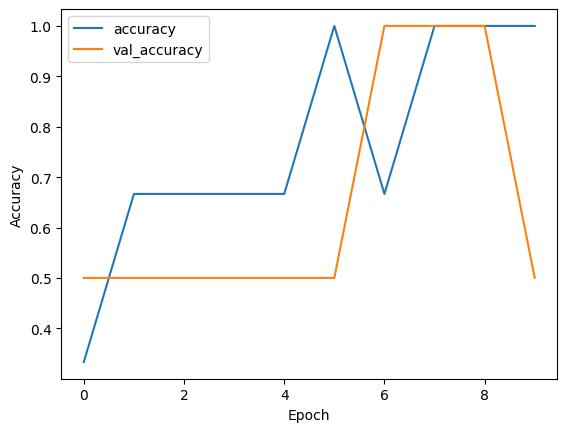

In [26]:
# You can access training history for plotting loss/accuracy curves if needed
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### **Question 10:** You are working on a web application for a medical imaging startup. Your task is to build and deploy a CNN model that classifies chest X-ray images into “Normal”and “Pneumonia” categories. Describe your end-to-end approach–from data preparation and model training to deploying the model as a web app using Streamlit.

**Answer:** End-to-End Approach for Chest X-ray Classification Using CNN and Streamlit

To build and deploy a CNN model that classifies chest X-ray images into Normal and Pneumonia categories, an end-to-end pipeline is followed, covering data preparation, model training, evaluation, and deployment as a web application.

Data Preparation:

The first step involves collecting a labeled chest X-ray dataset and organizing it into training, validation, and testing directories. Since X-ray images vary in size and intensity, images are resized to a fixed resolution and normalized to scale pixel values between 0 and 1. Data augmentation techniques such as rotation, flipping, and zooming are applied to improve model generalization and reduce overfitting.

Model Training:

A Convolutional Neural Network (CNN) is designed or a pre-trained model such as ResNet or VGG is fine-tuned using transfer learning. The model learns discriminative features from X-ray images through convolution, pooling, and fully connected layers. The network is compiled with an appropriate optimizer (e.g., Adam) and a binary classification loss function. Model performance is evaluated using metrics such as accuracy, precision, recall, and confusion matrix analysis.

Model Evaluation and Saving:

After training, the model is validated on unseen test data to ensure reliable performance. The trained model is then saved in a format such as HDF5 or SavedModel for deployment.

Web Application Deployment Using Streamlit:

For deployment, a Streamlit-based web application is developed. The saved CNN model is loaded into the app, and users can upload chest X-ray images through the interface. The uploaded image is preprocessed in the same way as the training data and passed to the model for prediction. The app displays the predicted class (Normal or Pneumonia) along with the confidence score.

Conclusion:

This end-to-end approach ensures a seamless workflow from data preparation and CNN training to real-time deployment, enabling healthcare professionals to quickly and efficiently analyze chest X-ray images through a user-friendly web application.